In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection

In [2]:
df_data = pd.read_csv('customer_churn.csv')

In [3]:
df_data.columns = ['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan', 'Vmail_Plan', 'VMail_Message', 'Day_Mins',
                  'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
                  'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn']

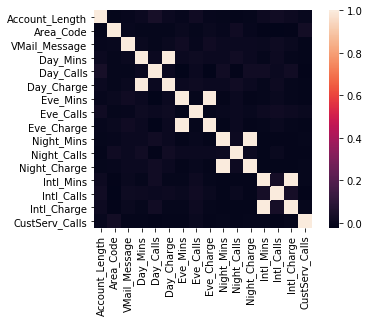

In [4]:
## Check overall correlation
cor = df_data.corr()
sns.heatmap(cor, square = True) 
## Similar as common sense, call minutes has correlation with charge

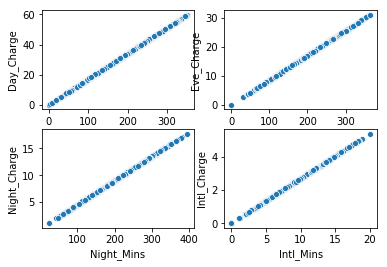

In [13]:
## To double check, scatterplot the minutes and the charge
f, ([(ax1, ax2), (ax3, ax4)]) = plt.subplots(2,2)
sns.scatterplot(df_data['Day_Mins'], df_data['Day_Charge'], ax=ax1)
sns.scatterplot(df_data['Eve_Mins'], df_data['Eve_Charge'], ax=ax2)
sns.scatterplot(df_data['Night_Mins'], df_data['Night_Charge'], ax=ax3)
sns.scatterplot(df_data['Intl_Mins'], df_data['Intl_Charge'], ax=ax4)
## They are highly correlated

In [16]:
df_data['Day_rate'] = df_data.Day_Mins / df_data.Day_Charge
df_data['Eve_rate'] = df_data.Eve_Mins / df_data.Eve_Charge
df_data['Night_rate'] = df_data.Night_Mins / df_data.Night_Charge
df_data['Intl_rate'] = df_data.Intl_Mins / df_data.Intl_Charge

In [17]:
df_data_final = df_data.drop(columns = ['Phone', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 
                                        'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Day_rate', 'Eve_rate', 'Night_rate',
                                        'Intl_rate'])

In [30]:
df_data_final.replace({'Churn': {'False.': 0, 'True.': 1}}, inplace=True)
df_data_final.replace({'Area_Code': {408: 1, 415: 2, 510: 3}}, inplace=True)
df_data_final.replace({'Intl_Plan': {'no': 1, 'yes': 2}}, inplace=True)
df_data_final.replace({'VMail_Plan': {'no': 1, 'yes': 2}}, inplace=True)
df_data_final.replace({'State': {'AK':1, 'AL':2, 'AR':3, 'AZ':4, 'CA':5, 'CO':6, 'CT':7, 'DC':8, 'DE':9, 'FL':10, 'GA':11, 'HI':12,
                          'IA':13, 'ID':14, 'IL':15, 'IN':16, 'KS':17, 'KY':18, 'LA':19, 'MA':20, 'MD':21, 'ME':22, 'MI':23, 
                          'MN':24, 'MO':25, 'MS':26, 'MT':27, 'NC':28, 'ND':29, 'NE':30, 'NH':31, 'NJ':32, 'NM':33, 'NV':34,
                          'NY':35, 'OH':36, 'OK':37, 'OR':38, 'PA':39, 'RI':40, 'SC':41, 'SD':42, 'TN':43, 'TX':44, 'UT':45,
                          'VA':46, 'VT':47, 'WA':48, 'WI':49, 'WV':50, 'WY':51}}, inplace=True)
df_data_final.replace(regex=r'yes', value=2, inplace=True)
df_data_final.replace(regex=r'no', value=1, inplace=True)

,State,Account_Length,Area_Code,Intl_Plan,Vmail_Plan,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn
State,1.000000,0.003678,0.015430,-0.004597,-0.031664,-0.027762,-0.006737,0.013682,0.024576,-0.007834,-0.025861,0.007780
Account_Length,0.003678,1.000000,-0.014530,0.024735,0.002918,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541
Area_Code,0.015430,-0.014530,1.000000,0.044033,0.009875,0.009077,0.010475,0.000283,0.007098,0.001549,0.028250,0.003256
Intl_Plan,-0.004597,0.024735,0.044033,1.000000,0.006006,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852
Vmail_Plan,-0.031664,0.002918,0.009875,0.006006,1.000000,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148
VMail_Message,-0.027762,-0.004628,0.009077,0.008745,0.956927,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728
Day_Mins,-0.006737,0.006216,0.010475,0.049396,-0.001684,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151
Eve_Mins,0.013682,-0.006757,0.000283,0.019100,0.021545,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796
Night_Mins,0.024576,-0.008955,0.007098,-0.028905,0.006079,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493
Intl_Mins,-0.007834,0.009514,0.001549,0.045871,-0.001318,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239


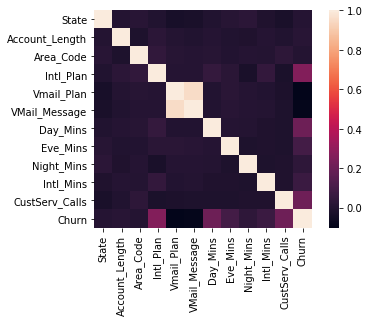

In [31]:
## Check the correlation again before modeling
cor = df_data_final.corr()
sns.heatmap(cor, square = True) 
df_data_final.corr()
## Churn has some correlation with other variables, but low correlation between the rest

In [39]:
# One-third of data as a part of test set
array = df_data_final.values
X = array[:,0:11] # Features/Independent Variables
Y = array[:,11] # Response/Class Variable
validation_size = 0.3
scoring = 'accuracy'
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

train_size = len(X_train)
val_size = len(X_validation)
print(val_size)
print(train_size)

1000
2333


In [34]:
#KNN
## Since we have 11 features, start with the odd number closest to the root square of 11: 3
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, Y_train)
pred_knn3 = knn3.predict(X_validation)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [35]:
print("KNN Accuracy (N = 3):", knn3.score(X_validation, Y_validation))

KNN Accuracy (N = 3): 0.864


In [36]:
## N = 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, Y_train)
pred_knn5 = knn5.predict(X_validation)
print("KNN Accuracy (N = 5):", knn5.score(X_validation, Y_validation))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

KNN Accuracy (N = 5): 0.869


In [37]:
## N = 7
knn7 = neighbors.KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train, Y_train)
pred_knn7 = knn7.predict(X_validation)
print("KNN Accuracy (N = 7):", knn7.score(X_validation, Y_validation))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

KNN Accuracy (N = 7): 0.866


In [40]:
#Model Performance
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_r_knn3 = model_selection.cross_val_score(knn3, X_train, Y_train, cv=kfold, scoring=scoring)
msg_knn3 = "%s: %f (%f)" % ('KNN3 accuracy', cv_r_knn3.mean(), cv_r_knn3.std())

cv_r_knn5 = model_selection.cross_val_score(knn5, X_train, Y_train, cv=kfold, scoring=scoring)
msg_knn5 = "%s: %f (%f)" % ('KNN5 accuracy', cv_r_knn5.mean(), cv_r_knn5.std())

cv_r_knn7 = model_selection.cross_val_score(knn7, X_train, Y_train, cv=kfold, scoring=scoring)
msg_knn7 = "%s: %f (%f)" % ('KNN7 accuracy', cv_r_knn7.mean(), cv_r_knn7.std())

print(msg_knn3)
print(msg_knn5)
print(msg_knn7)

KNN3 accuracy: 0.866270 (0.023147)
KNN5 accuracy: 0.883843 (0.020414)
KNN7 accuracy: 0.889835 (0.024210)


Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predicyions')

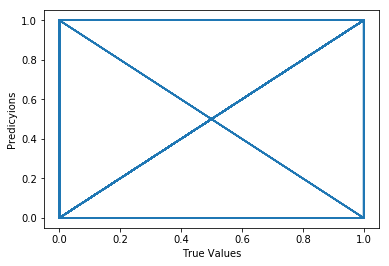

In [45]:
plt.plot(pred_knn7, Y_validation)
plt.xlabel("True Values")
plt.ylabel("Predicyions")